<div align="center">

# 💙 Job Salaries in 2025

</div>

---
In this notebook, we perform **exploratory data analysis (EDA)** on a global salary dataset for roles in **AI, Machine Learning, and Data Science**, covering the years 2020–2025. We will examine key trends such as:  
- How salaries varies by **experience level**  
- Geographic patterns in  **pay**
- The impact of **remote work ratio**  
- **Company size** effects on salaries  

💡 For data cleaning (e.g. removing duplicates, correcting invalid country codes, handling missing values), please refer to the separate notebook: **[Databereinigung](https://nikolinamaric.eu.pythonanywhere.com/explorative_datenanalyse.html)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv("dataset_clean.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516.0,USD,348516.0,US,0,US,M
1,2025,EX,FT,Head of Data,232344.0,USD,232344.0,US,0,US,M
2,2025,SE,FT,Data Scientist,145400.0,USD,145400.0,US,0,US,M
3,2025,SE,FT,Data Scientist,81600.0,USD,81600.0,US,0,US,M
4,2025,MI,FT,Engineer,160000.0,USD,160000.0,US,100,US,M


In [4]:
# Import the check_and_clean_dataset function from the utility.py file - performs a final data quality check and basic cleaning on a DataFrame.
from utility import check_and_clean_dataset

In [5]:
# Run the data quality check and cleaning function on the dataframe 'df'
df = check_and_clean_dataset(df)


----------------------------------------
        FINAL DATA QUALITY CHECK
----------------------------------------

✅ No missing values found in any column.

✅ Unique values for categorical columns:
🔹 experience_level: ['EX' 'SE' 'MI' 'EN']
🔹 employment_type: ['FT' 'CT' 'PT' 'FL']
🔹 company_size: ['M' 'L' 'S']
🔹 remote_ratio: [  0 100  50]

✅ Salary (USD) statistics:
🔹 Range: 12726.324406826008 to 819449.8936071652
🔹 Summary:
count    151319.000000
mean     157537.674999
std       74320.436109
min       12726.324407
25%      105603.426536
50%      146242.586425
75%      198000.000000
max      819449.893607
Name: salary_in_usd, dtype: float64

✅ All employee residence codes are valid.
✅ All company location codes are valid.

✅ Total duplicates found: 0
✅ Duplicates removed. New dataset shape: (151319, 11)

✅ Final dataset shape: (151319, 11)

✅ Column data types:
work_year               int64
experience_level       object
employment_type        object
job_title              object
sala

<div align="center">

## 🔎 Exploratory Data Analysis (EDA)

</div>

In this section, we dive into the **Exploratory Data Analysis (EDA)** of our global AI / Data Science salaries dataset. Our goal is to uncover patterns, trends, and anomalies in compensation — by experience level, geography, remote work, and more.

**What we will explore:**

- **Univariate analysis**: Distribution of salary, experience, company size, etc.  
- **Outlier detection**: Identify unusually high/low salaries and investigate their validity  
- **Bivariate relationships**: How salary relates to experience level, remote ratio, and company size  
- **Geographic insights**: Which countries dominate, and how pay differs across them  
- **Time trends**: Evolution of salaries and number of salary reports over the years  


## 🔎 Univariate Analysis — Categorical Distributions

In this section, we analyze the distribution of all categorical columns to gain a clear understanding of the dataset’s composition before investigating more complex relationships.

🔹 Column 'work_year' - All categories with relative %:
  work_year  percentage
0      2025       51.98
1      2024       41.10
2      2023        5.63
3      2022        1.10
4      2021        0.14
5      2020        0.05
🔹 Column 'experience_level' - All categories with relative %:
  experience_level  percentage
0               SE       57.05
1               MI       30.24
2               EN        9.22
3               EX        3.49
🔹 Column 'employment_type' - All categories with relative %:
  employment_type  percentage
0              FT       98.80
1              CT        0.50
2              PT        0.47
3              FL        0.23
🔹 Column 'job_title' - Top 10 categories with relative %:
                   job_title  percentage
0             Data Scientist       17.81
1          Software Engineer       16.09
2              Data Engineer       15.56
3               Data Analyst       13.10
4                   Engineer       10.44
5  Machine Learning Engineer        8.44
6   

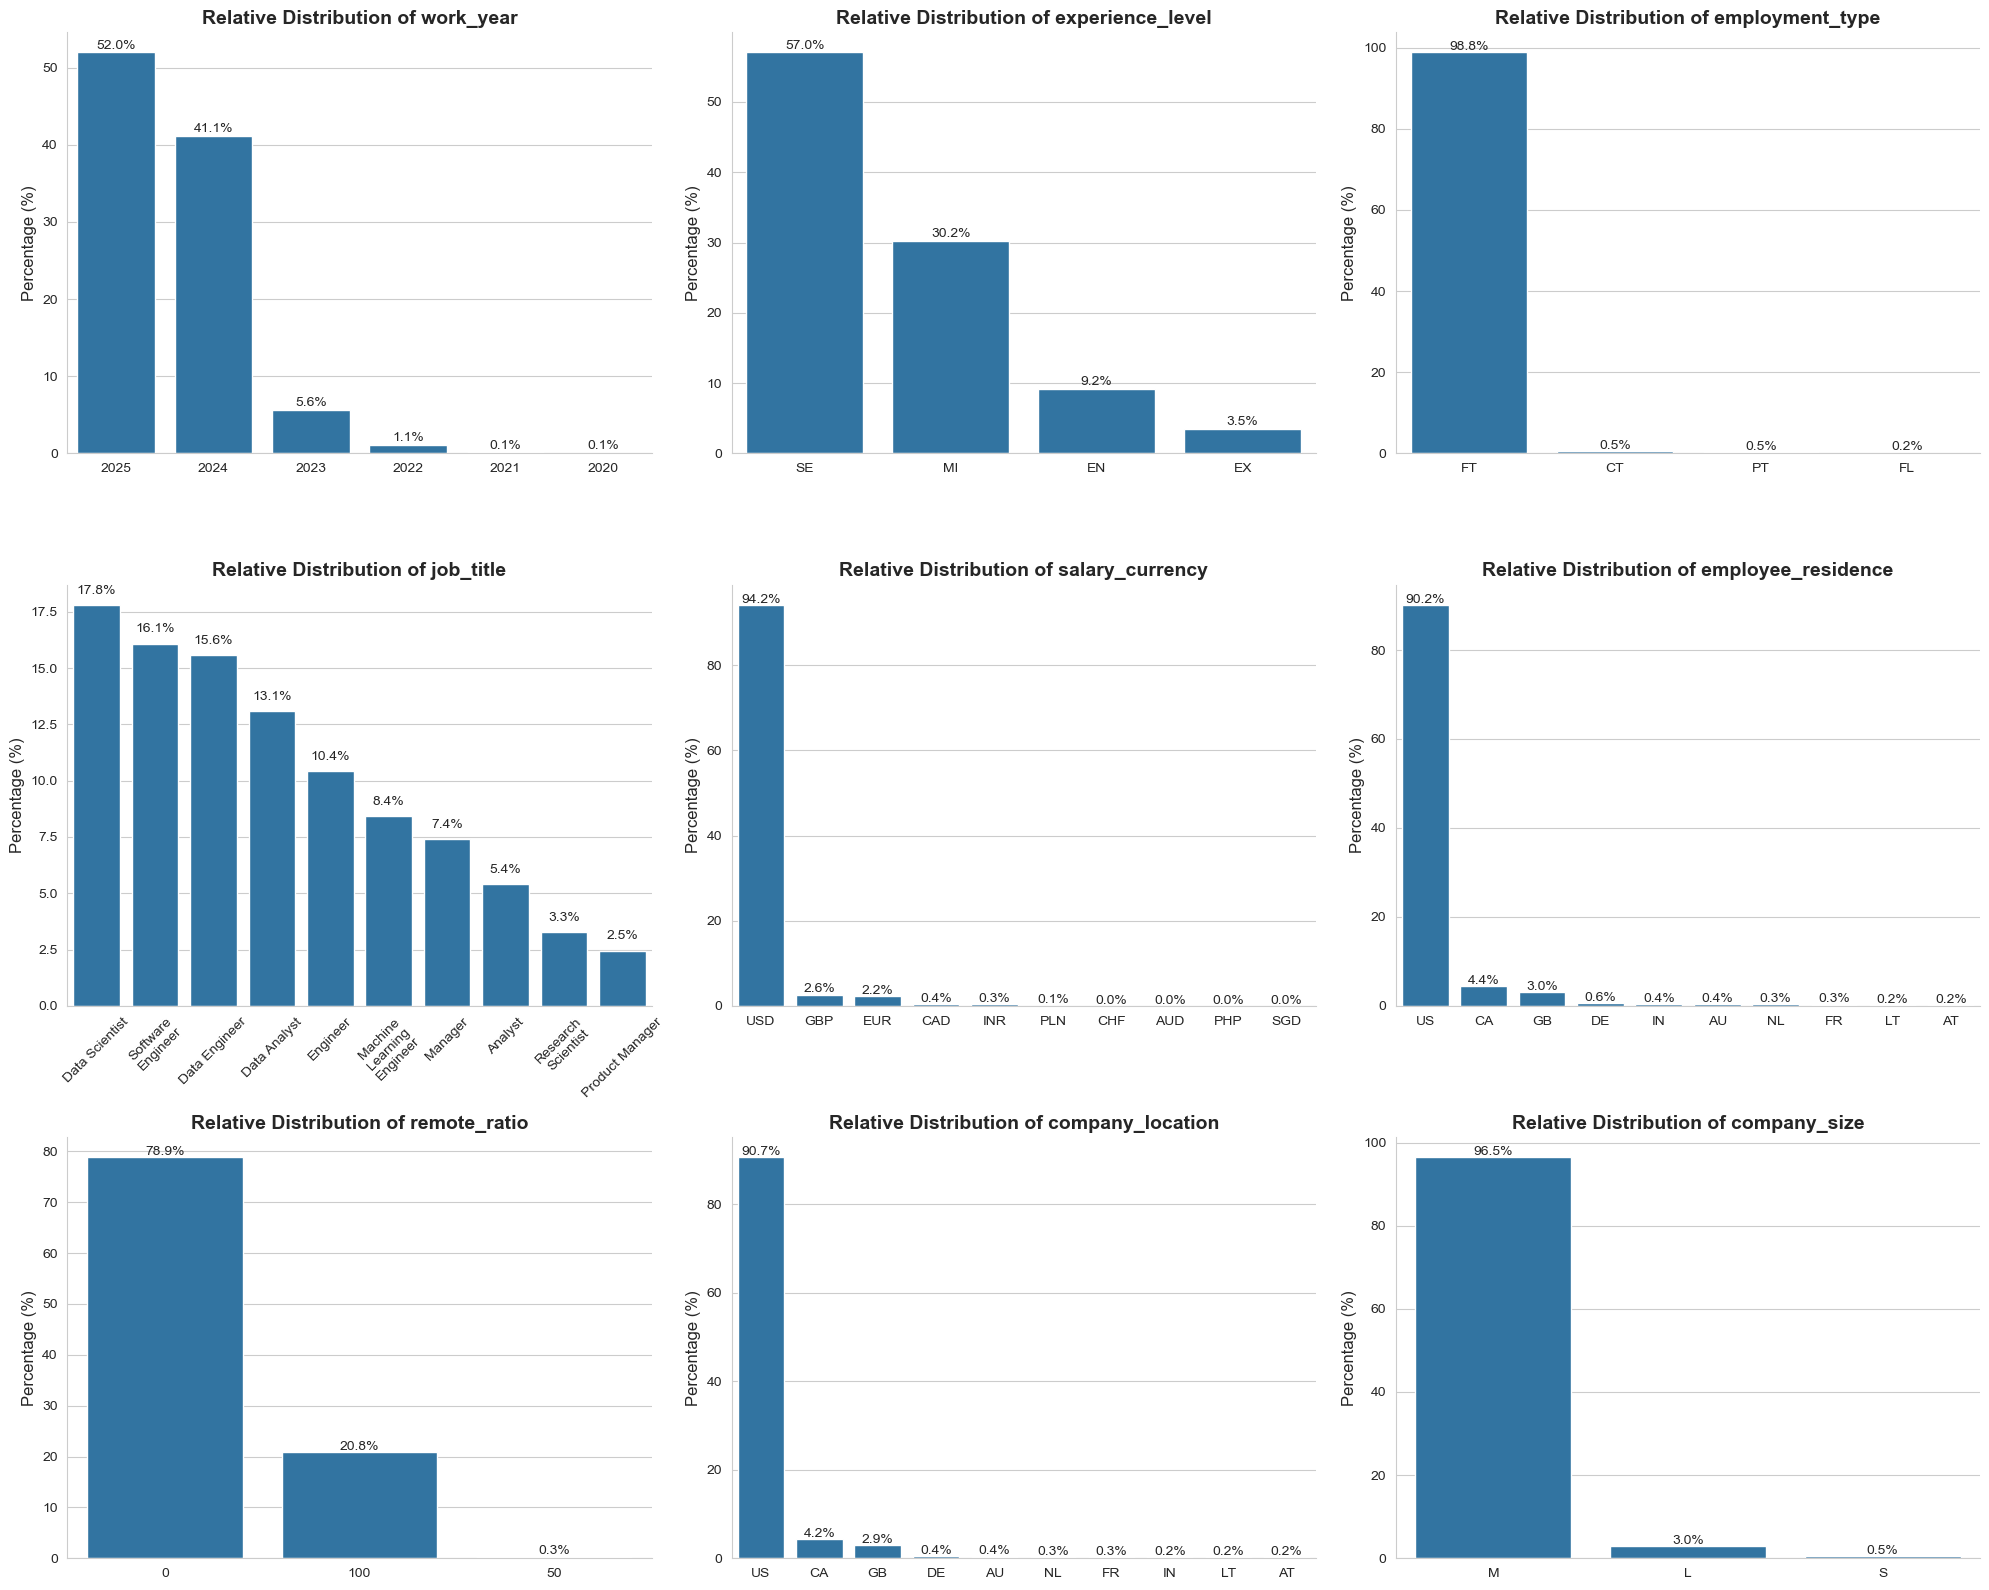

In [8]:
import textwrap

# Create a copy of the original DataFrame `df` for EDA
df_eda = df.copy()

# Set Seaborn visual style and color palette
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("tab10"))

# List of categorical columns to plot
columns_categories = [
    "work_year", "experience_level", "employment_type", "job_title",
    "salary_currency", "employee_residence", "remote_ratio", "company_location", "company_size"]

# Create a figure with a 3x3 grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()  # Flatten 2D array of axes for easier iteration

# Loop through each axis and categorical column
for ax, column in zip(axes, columns_categories):
    
    # For columns with many unique values, select top 10 categories only
    if column in ["job_title", "salary_currency", "employee_residence", "company_location"]:
        top10 = df_eda[column].value_counts().nlargest(10)
        df_plot = pd.DataFrame({
            column: top10.index.astype(str),  # Convert to string to avoid Seaborn plotting all categories
            'percentage': (top10.values / top10.values.sum() * 100).round(2)  # Calculate relative percentages
        }).reset_index(drop=True)
        print(f"🔹 Column '{column}' - Top 10 categories with relative %:")
        print(df_plot)
    else:
        # For other columns, include all categories
        counts = df_eda[column].value_counts()
        df_plot = pd.DataFrame({
            column: counts.index.astype(str),
            'percentage': (counts.values / counts.values.sum() * 100).round(2)  # Relative percentages
        }).reset_index(drop=True)
        print(f"🔹 Column '{column}' - All categories with relative %:")
        print(df_plot.head(10))  # Print only first 10 rows for readability

    # Wrap long job titles before plotting
    if column == "job_title":
        df_plot[column] = df_plot[column].apply(lambda x: "\n".join(textwrap.wrap(x, width=15)))

    # Plot the relative percentages using Seaborn barplot
    sns.barplot(data = df_plot, x = column, y = 'percentage', ax = ax)

    # Rotate x-axis labels: only job_title rotated 45, others 0
    if column == "job_title":
        ax.tick_params(axis ='x', rotation = 45)
    else:
        ax.tick_params(axis = 'x', rotation = 0)
    
    # Set the title and y-axis label
    ax.set_title(f"Relative Distribution of {column}", fontsize=14, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Percentage (%)", fontsize=12)
    
    # Remove top and right spines for a cleaner look
    sns.despine(ax = ax, top=True, right=True)

    # Add percentage labels above each bar
    for p in ax.patches:
        label_height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X coordinate: center of the bar
            label_height + 0.5,             # Y coordinate: slightly above the bar
            f'{label_height:.1f}%',         # Label text
            ha='center', fontsize=10        # Center alignment
        )

# Adjust layout so subplots do not overlap
fig.tight_layout()
plt.show()


## 🧑‍💼 Job Title Analysis — Frequency & Salary Distribution

This section examines the most common job titles in the dataset and their associated salary distributions. By analyzing both frequency and salary patterns, we gain insights into the roles that dominate the workforce and their compensation trends.


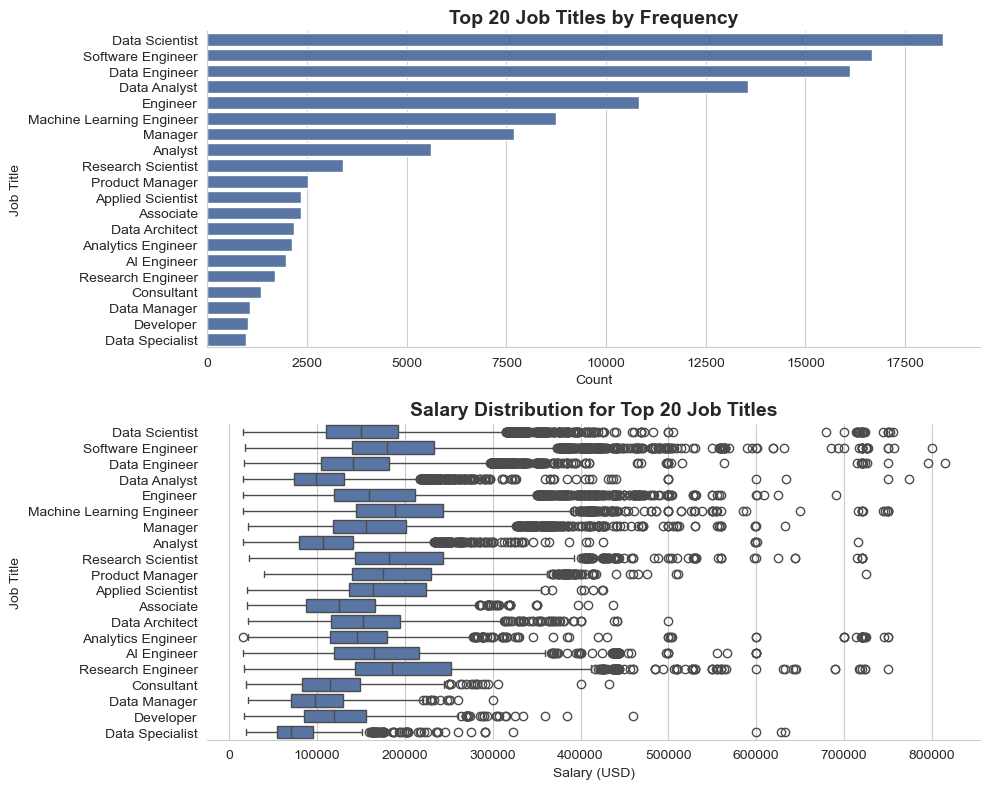

In [10]:
# Set palette
sns.set_palette(sns.color_palette("deep"))

#top 20 job titles
top20_job_titles = df_eda['job_title'].value_counts().nlargest(20).index
df_top20_job_titles = df_eda[df_eda['job_title'].isin(top20_job_titles)]

# Create 2x1 subplot: bar plot + box plot
fig, (ax_bar, ax_box) = plt.subplots(2, 1, figsize=(10, 8))

# Barplot: Top 20 job titles by frequency
sns.countplot(
    y = 'job_title',
    data = df_top20_job_titles,
    order = top20_job_titles,
    ax = ax_bar)

# Set title and labels
ax_bar.set_title("Top 20 Job Titles by Frequency", fontsize=14, fontweight='bold')
ax_bar.set_xlabel("Count")
ax_bar.set_ylabel("Job Title")
sns.despine(ax = ax_bar, top=True, right=True)

# Boxplot: Salary distribution for top 20 job titles
sns.boxplot(
    x = 'salary_in_usd',
    y = 'job_title',
    data = df_top20_job_titles,
    order = top20_job_titles,
    ax = ax_box)

# Set title and labels
ax_box.set_title("Salary Distribution for Top 20 Job Titles", fontsize = 14, fontweight = 'bold')
ax_box.set_xlabel("Salary (USD)")
ax_box.set_ylabel("Job Title")
sns.despine(ax = ax_box, top=True, right=True, left=True)

# Adjust layout
fig.tight_layout()
plt.show()


# 🔹 Categorical Data Overview

- **Work Year:** Most employees are from 2025 (52%) and 2024 (41%), indicating the dataset is heavily recent.  
- **Experience Level:** Majority are Senior-level (57%) and Mid-Level (30%), with Entry/Executive levels being less common.
- **Employment Type:** Full-time positions dominate (99%), while contract, part-time, and freelance roles are rare.  
- **Job Title (Top 10):** Data Scientists, Software Engineers, and Data Engineers make up the largest share (~17–16%), with other roles gradually decreasing.  
- **Salary Currency:** USD overwhelmingly dominates (94%), showing most salaries are reported in US dollars.  
- **Employee Residence (Top 10):** Most employees reside in the US (90%), followed by Canada and the UK. Other countries represent very small fractions.  
- **Remote Ratio:** Majority work fully on-site (79%), some fully remote (21%), very few hybrid (0.3%).  
- **Company Location (Top 10):** Similar to employee residence, US-based companies dominate (91%), followed by Canada and the UK.  
- **Company Size:** Medium-sized companies (M) are predominant (96%), with large (L) and small (S) companies being much less common.  

**💡 Insight:** The dataset is heavily skewed towards US-based, full-time, Senior and Mid-level employees in medium-sized companies, with a strong focus on tech-related roles like Data Scientist and Software Engineer. This should be considered when interpreting any analysis or generalizing results.


## 🔎 Univariate Analysis — Numerical Distributions

Here, we examine the distribution of the key numerical variable **salary in USD**. This helps us understand its spread, central tendency, and potential outliers before further analysis.


In [13]:
def plot_salary_hist_box(df, column = "salary_in_usd", title_prefix = "Salary", 
                         ax_hist=None, ax_box=None, hist_color=None, box_color=None):
    """
    Plots a histogram with KDE and a boxplot for a given salary column, with customizable colors.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the salary column.
    column : str
        Name of the salary column to plot.
    title_prefix : str
        Prefix for the plot titles.
    ax_hist : matplotlib.axes._subplots.AxesSubplot, optional
        Axis to plot the histogram on. If None, creates a new figure.
    ax_box : matplotlib.axes._subplots.AxesSubplot, optional
        Axis to plot the boxplot on. If None, creates a new figure.
    hist_color : str or tuple, optional
        Color for the histogram bars.
    box_color : str or tuple, optional
        Color for the boxplot.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    # If axes are not provided, create a new figure
    if ax_hist is None or ax_box is None:
        fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize = (8, 6), sharex=False)
        show_plot = True
    else:
        show_plot = False
        
    # Set default colors if not provided
    if hist_color is None:
        hist_color = sns.color_palette("mako")[2]
    if box_color is None:
        box_color = sns.color_palette("mako")[1]
        
    # Histogram with KDE
    sns.histplot(df[column].dropna(),
                 kde = True, 
                 bins = 50,
                 color = hist_color, 
                 edgecolor = "white",
                 ax = ax_hist)

    # Set title and labels
    ax_hist.set_title(f"{title_prefix} Histogram", fontsize = 14, fontweight = 'bold')
    ax_hist.set_xlabel("")
    ax_hist.set_ylabel("Count", fontsize = 12)

    # Boxplot
    sns.boxplot(x = df[column].dropna(),
                color = box_color, 
                ax = ax_box)

    # Set title and labels
    ax_box.set_title(f"{title_prefix} Boxplot", fontsize = 14, fontweight = 'bold')
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")
    
    # Remove top/right spines for a cleaner look
    sns.despine(ax = ax_hist, top=True, right=True)
    sns.despine(ax = ax_box, left=True, top=True, right=True)

    # Display the plot only if axes were created inside the function
    if show_plot:
        plt.tight_layout()
        plt.show()


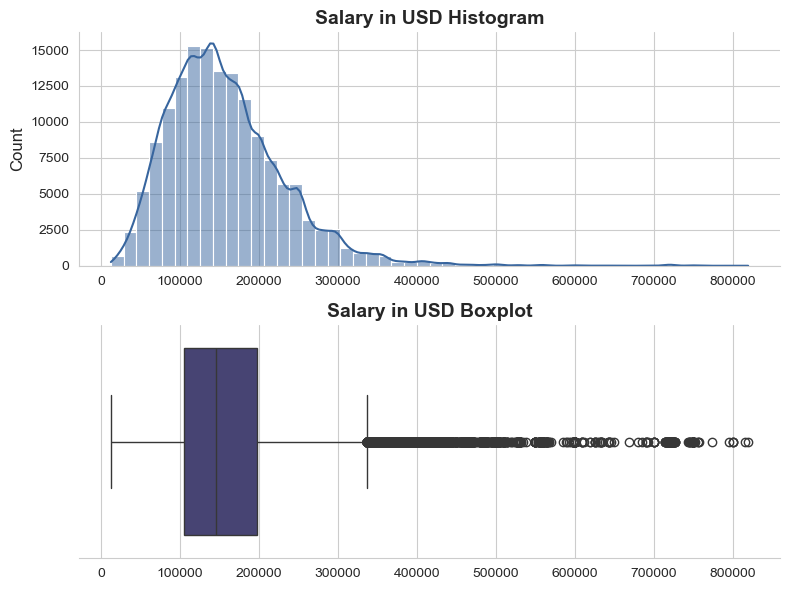

In [14]:
# Plot salary distribution using histogram and boxplot
plot_salary_hist_box(df_eda, title_prefix = "Salary in USD")

## 🚨 Outlier Detection

In this part, we identify unusually high or low **`salary_in_usd`** values using statistical methods (e.g. IQR rule). These “outliers” may represent data entry issues, very senior roles, or extreme compensation. We will:

- Compute thresholds for outliers  
- Highlight how many data points fall outside “normal” salary range  
- Visualize these outliers to assess whether they are realistic or erroneous  
- Decide whether to flag, remove, or keep them for further analysis  


🔹 Q1 = 105603.43
🔹 Q3 = 198000.00
🔹 IQR = 92396.57
🔹 Lower bound = -32991.43
🔹 Upper bound = 336594.86
🔹 Number of outlier rows: 3346 (2.21%)



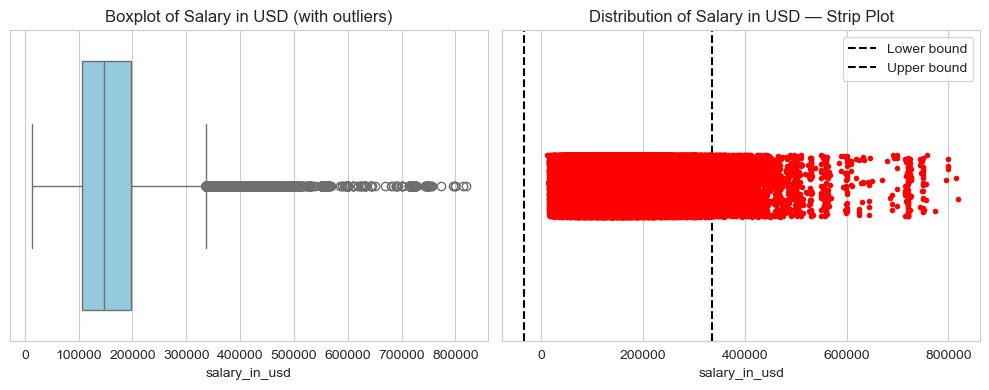


✅ Flagged outliers in 'is_outlier_salary' column. Sample:



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_outlier_salary
0,2025,EX,FT,Head of Data,348516.000000,USD,348516.000000,US,0,US,M,True
54,2025,SE,FT,Engineer,350000.000000,USD,350000.000000,US,0,US,M,True
56,2025,SE,FT,Engineer,352019.552012,USD,350304.518467,US,0,US,M,True
186,2025,SE,FT,Software Engineer,340000.000000,USD,340000.000000,US,0,US,M,True
188,2025,SE,FT,Software Engineer,339102.212696,USD,339048.606138,US,0,US,M,True


In [16]:
# ----------------------------
# Compute IQR-based thresholds for salary_in_usd
# ----------------------------

# Calculate the first quartile (Q1) and third quartile (Q3) for salaries in USD
Q1 = df_eda['salary_in_usd'].quantile(0.25)  # 25th percentile
Q3 = df_eda['salary_in_usd'].quantile(0.75)  # 75th percentile

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1  # Measures the spread of the middle 50% of salaries

# Determine the bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR  # Salaries below this are considered potential outliers
upper_bound = Q3 + 1.5 * IQR  # Salaries above this are considered potential outliers

print(f"🔹 Q1 = {Q1:.2f}")
print(f"🔹 Q3 = {Q3:.2f}")
print(f"🔹 IQR = {IQR:.2f}")
print(f"🔹 Lower bound = {lower_bound:.2f}")
print(f"🔹 Upper bound = {upper_bound:.2f}")

# ----------------------------
# Highlight how many data points are outside “normal” range
# ----------------------------

outliers_mask = df_eda[(df_eda['salary_in_usd'] < lower_bound) | (df_eda['salary_in_usd'] > upper_bound)]
num_outliers = outliers_mask.shape[0]
print(f"🔹 Number of outlier rows: {num_outliers} ({num_outliers / df_eda.shape[0] * 100:.2f}%)\n")

# ----------------------------
# Visualize the outliers
# ----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot with outliers
sns.boxplot(x = df_eda['salary_in_usd'], 
            ax = ax1, 
            color = 'skyblue')

# Set title
ax1.set_title("Boxplot of Salary in USD (with outliers)")

# Scatter / strip plot to show outlier distribution
sns.stripplot(x = df_eda['salary_in_usd'], 
              ax = ax2, 
              color = 'red', 
              size = 4, 
              jitter = True)

# Set title
ax2.set_title("Distribution of Salary in USD — Strip Plot")

# Mark the bounds as vertical lines in the scatter plot
ax2.axvline(lower_bound, color = 'black', linestyle = '--', label = 'Lower bound')
ax2.axvline(upper_bound, color = 'black', linestyle = '--', label = 'Upper bound')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# ----------------------------
# Decide what to do with outliers: flag them in the DataFrame
# ----------------------------
df_eda['is_outlier_salary'] = ((df_eda['salary_in_usd'] < lower_bound) | (df_eda['salary_in_usd'] > upper_bound))

print("\n✅ Flagged outliers in 'is_outlier_salary' column. Sample:\n")
display(df_eda[df_eda['is_outlier_salary']].head())


## 🚨 Interpretation & Rationale for Clipping Outliers

- The IQR‑based analysis shows that outliers above ~ 336,600 USD account for ~2.21% of the dataset.  
- Since the lower bound is negative (which is not realistic for salary), the extreme values are all on the high end.  
- Instead of removing these high salaries, we will **winsorize (clip)** them. This approach:  
  - Preserves the data points and sample size, avoiding information loss.  
  - Reduces their disproportionate influence on statistical measures (mean, variance).  
  - Makes the analysis more robust by limiting the impact of extreme values while keeping them in the dataset.  


In [18]:
# Create a copy of the DataFrame to work on
df_cliped = df_eda.copy()

# Clip the salary_in_usd values outside the bounds
df_cliped['salary_in_usd_cliped'] = df_cliped['salary_in_usd'].clip(lower = lower_bound, upper = upper_bound)

# Print before / after comparison
print("🔹 Original max salary:", f"{df_eda['salary_in_usd'].max():.2f}$")
print("🔹 Capped max salary:", f"{df_cliped['salary_in_usd_cliped'].max():.2f}$")

# Check how many values were capped (above the bound)
num_outliers = (df_cliped['salary_in_usd'] > upper_bound).sum()
print(f"🔹 Number of values clipped at upper bound: {num_outliers}")


🔹 Original max salary: 819449.89$
🔹 Capped max salary: 336594.86$
🔹 Number of values clipped at upper bound: 3346


### 📊 Interpretation & Rationale After Winsorization

- The original maximum salary in USD was extremely high (~ 819,450 USD), clearly beyond what most of the data represents.  
- After capping at the upper bound (~ 336,595 USD), the clipped salaries still retain the overall structure of the data, but without the disproportionate influence of extreme outliers.  
- We clipped **3,346 values**, exactly matching the number of flagged outliers — this preserves sample size while limiting their impact.  
- **Why winsorize** instead of remove:  
  - Winsorization (capping) reduces the influence of extreme values on descriptive statistics (e.g., mean, variance) without discarding data points. 
  - This approach improves robustness of the analysis, especially when outliers might represent valid but extreme compensation (e.g., high-level) 
  - By preserving all observations, we maintain the data’s integrity and avoid potential bias that comes from dropping data.

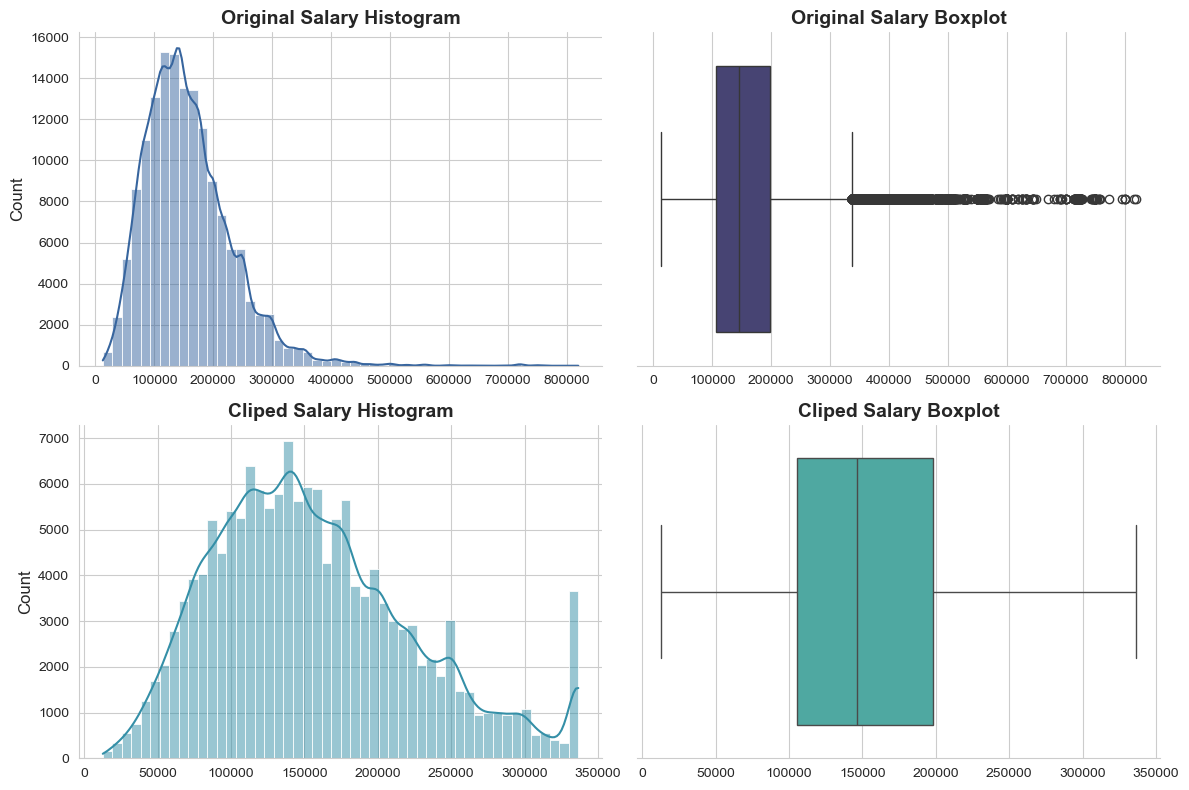

In [20]:
# Create a 2x2 figure: original vs cliped
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
(ax_h_orig, ax_b_orig), (ax_h_cap, ax_b_cap) = axes

# Original Salary plots
plot_salary_hist_box(df_eda, title_prefix = "Original Salary",
                     ax_hist = ax_h_orig, ax_box = ax_b_orig,
                     hist_color = sns.color_palette("mako")[2],
                     box_color = sns.color_palette("mako")[1])

# Cliped Salary plots
plot_salary_hist_box(df_cliped, title_prefix = "Cliped Salary", column = "salary_in_usd_cliped",
                     ax_hist = ax_h_cap, ax_box = ax_b_cap,
                     hist_color = sns.color_palette("mako")[3],
                     box_color = sns.color_palette("mako")[4])

# Adjust layout
fig.tight_layout()
plt.show()

## 🔍 Bivariate Relationships — Salary Against Key Factors

In this section, we examine how **salary in USD** relates to important categorical variables:

- **Experience Level**: Compare compensation across EN, MI, SE, and EX seniority levels  
- **Remote Ratio**: Explore how being on-site, hybrid, or fully remote affects pay  
- **Company Size**: Analyze differences in salary between small, medium, and large companies  

By visualizing these relationships (e.g., using boxplots), we can uncover how these factors influence compensation and identify any patterns or disparities.


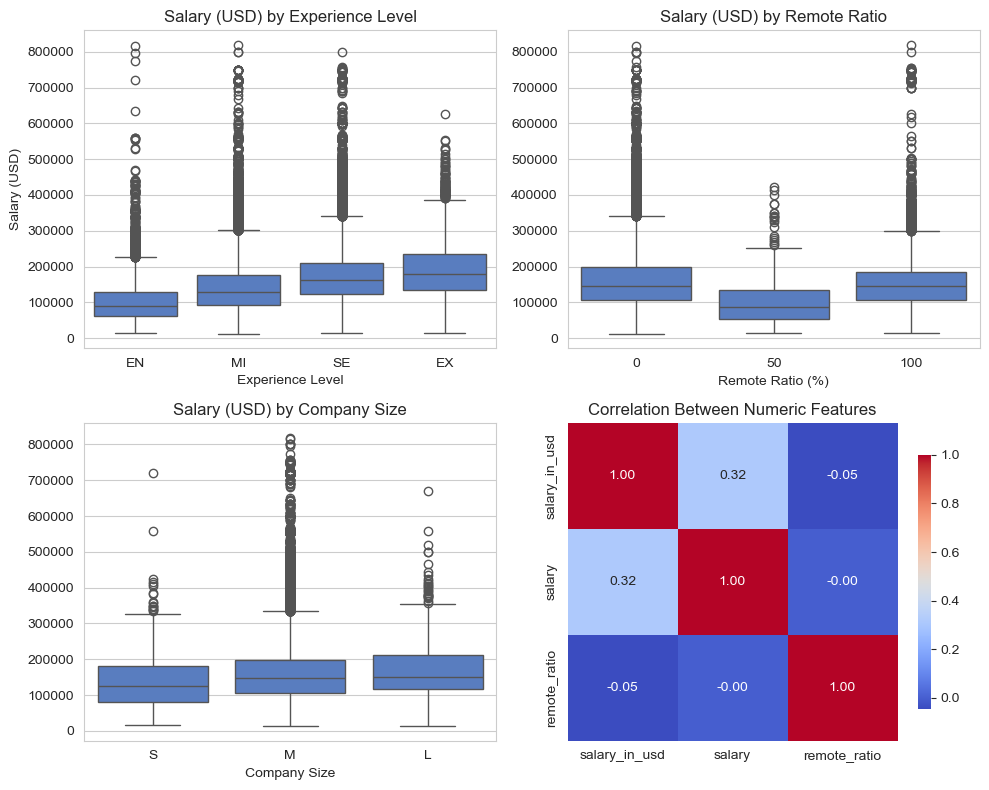

In [22]:
# Set Seaborn color palette
sns.set_palette("muted")

# Create a 2×2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax_exp, ax_remote), (ax_size, ax_corr) = axes  # unpack axes for easier reference

# -------------------------------
# Salary vs Experience Level
# -------------------------------
# Boxplot showing salary distribution across experience levels (EN, MI, SE, EX)
sns.boxplot(
    x = 'experience_level', 
    y = 'salary_in_usd', 
    data = df_eda, 
    order = ['EN','MI','SE','EX'],
    ax = ax_exp)

# Set title and labels
ax_exp.set_title("Salary (USD) by Experience Level")
ax_exp.set_xlabel("Experience Level")
ax_exp.set_ylabel("Salary (USD)")

# -------------------------------
# Salary vs Remote Ratio
# -------------------------------
# Boxplot showing salary distribution across remote work percentages
sns.boxplot(
    x = 'remote_ratio', 
    y = 'salary_in_usd', 
    data = df_eda, 
    ax = ax_remote)

# Set title and labels
ax_remote.set_title("Salary (USD) by Remote Ratio")
ax_remote.set_xlabel("Remote Ratio (%)")
ax_remote.set_ylabel("")

# -------------------------------
# Salary vs Company Size
# -------------------------------
# Boxplot showing salary distribution for different company sizes (S, M, L)
sns.boxplot(
    x = 'company_size', 
    y = 'salary_in_usd', 
    data = df_eda, 
    order = ['S','M','L'],
    ax = ax_size)

# Set title and labels
ax_size.set_title("Salary (USD) by Company Size")
ax_size.set_xlabel("Company Size")
ax_size.set_ylabel("")

# -------------------------------
# Correlation Heatmap
# -------------------------------
# Compute correlation matrix for selected numeric features
numeric_for_corr = df_eda[['salary_in_usd', 'salary', 'remote_ratio']]
corr = numeric_for_corr.corr()

# Display a heatmap of correlations between numeric variables
sns.heatmap(
    corr, 
    annot = True,       # display correlation coefficients
    cmap = 'coolwarm',  
    fmt = ".2f",        # format numbers to 2 decimal places
    ax = ax_corr,
    cbar_kws = {'shrink': .8})  # shrink colorbar for better fit
    
ax_corr.set_title("Correlation Between Numeric Features")

# Adjust layout
fig.tight_layout()
plt.show()

In [23]:
# -------------------------------
# Salary Analysis Summary (median values)
# -------------------------------
medians_exp = df_eda.groupby('experience_level', observed=False)['salary_in_usd'].median()
medians_remote = df_eda.groupby('remote_ratio', observed=False)['salary_in_usd'].median()
medians_size = df_eda.groupby('company_size', observed=False)['salary_in_usd'].median()

print("🔹 Salary Analysis Summary 🔹\n")

# Experience Level
print("Experience Level Medians:")
for level in ['EN', 'MI', 'SE', 'EX']:
    print(f"  {level}: ${medians_exp[level]:,.0f}")
print()

# Remote Ratio
print("Remote Ratio Medians:")
for remote_ratio in sorted(df_eda['remote_ratio'].unique()):
    print(f"  {remote_ratio}% remote: ${medians_remote[remote_ratio]:,.0f}")
print()

# Company Size
print("Company Size Medians:")
for size in ['S','M','L']:
    print(f"  {size}: ${medians_size[size]:,.0f}")
print()

# Correlation summary
corr_exp_salary = df_eda[['experience_level', 'salary_in_usd']].assign(
    experience_num=df_eda['experience_level'].map({'EN':1,'MI':2,'SE':3,'EX':4})
    )['experience_num'].corr(df_eda['salary_in_usd'])
corr_remote_salary = df_eda['remote_ratio'].corr(df_eda['salary_in_usd'])

print(f"Correlation (experience vs salary): {corr_exp_salary:.2f}")
print(f"Correlation (remote ratio vs salary): {corr_remote_salary:.2f}")


🔹 Salary Analysis Summary 🔹

Experience Level Medians:
  EN: $88,853
  MI: $130,000
  SE: $161,182
  EX: $180,000

Remote Ratio Medians:
  0% remote: $147,000
  50% remote: $86,173
  100% remote: $145,000

Company Size Medians:
  S: $125,000
  M: $146,301
  L: $149,210

Correlation (experience vs salary): 0.30
Correlation (remote ratio vs salary): -0.05


#### 📊 Salary Analysis Summary

- **Experience:** Median salaries rise with seniority: **EN (Entry):** \$88k → **EX (Executive):** \$180k.
- **Remote work:** Minimal effect; **fully remote:** \$145k vs **on-site:** \$147k.
- **Company size:** Medium/Large Company pay more than small Companys.
- **Correlations:** Salary moderately linked to experience; remote ratio has negligible effect.




## 🌐 Geographic Insights — Global Salary Patterns

In this section, we explore how **salary in USD** varies by geography — which countries dominate in the dataset and how compensation differs across them. Key questions include:

- Which countries have the most reported salaries (count)?  
- Which countries pay the highest average salaries?  

By analyzing these geographic trends, we can uncover whether certain regions truly command premium pay, and whether location drives significant variation in compensation — insights that may help understand global pay equity and market dynamics.  


In [26]:
def plot_top_countries_salary(df, top_n = 10):
    """
    Plots the top N countries by number of reported salaries and their average salary in USD.
    
    Parameters:
    - df: pandas DataFrame containing at least 'employee_residence' and 'salary_in_usd' columns
    - top_n: int, number of top countries to consider (default 10)

    Returns
    -------
    fig, (ax1, ax2) : tuple
        Figure and axes objects for optional further customization.
    """

    # Identify top N countries by number of reported salaries
    top_countries_counts = df['employee_residence'].value_counts().nlargest(top_n)
    top_countries = top_countries_counts.index.tolist()

    # Calculate average salary (USD) only for those top countries
    top_avg_salary = (
        df[df['employee_residence'].isin(top_countries)]
        .groupby('employee_residence', observed = True)['salary_in_usd']
        .mean()
        .loc[top_countries]
        .sort_values(ascending=False))

    # Print key insights
    print(f"🌍 Top {top_n} countries by number of reported salaries:")
    print(top_countries_counts)
    print(f"\n💵 Average salary (USD) for those top {top_n} countries:")
    print(top_avg_salary)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot: number of reports per country
    sns.barplot(
        x = top_countries_counts.values,
        y = top_countries_counts.index.astype(str),
     	hue = top_countries_counts.index,
        order = top_countries,
    	palette = "deep",  
        ax = ax1)

    # Set title and labels
    ax1.set_title(f"Top {top_n} Countries by Report Count", fontsize = 14, fontweight = 'bold')
    ax1.set_xlabel("Number of Reports")
    ax1.set_ylabel("Country")
    sns.despine(ax = ax1, top=True, right=True)

    # Bar plot: average salary (USD) per country
    sns.barplot(
        x = top_avg_salary.values,
        y = top_avg_salary.index,
    	hue = top_avg_salary.index.astype(str),
        order = top_avg_salary.index,
    	palette = "vlag",
        ax = ax2)

    # Set title and labels
    ax2.set_title(f"Average Salary (USD) in Top {top_n} Countries", fontsize = 14, fontweight = 'bold')
    ax2.set_xlabel("Average Salary (USD)")
    ax2.set_ylabel("Country")
    sns.despine(ax = ax2, top=True, right=True)

    return fig, (ax1, ax2)


🌍 Top 10 countries by number of reported salaries:
employee_residence
US    134125
CA      6487
GB      4488
DE       829
IN       619
AU       580
NL       476
FR       433
LT       362
AT       347
Name: count, dtype: int64

💵 Average salary (USD) for those top 10 countries:
employee_residence
US    163903.939666
DE    131285.747833
CA    131079.436311
AU    129035.582101
IN    118982.154133
GB    100198.563996
NL     78383.685091
FR     69381.913525
LT     59926.271712
AT     58626.538067
Name: salary_in_usd, dtype: float64


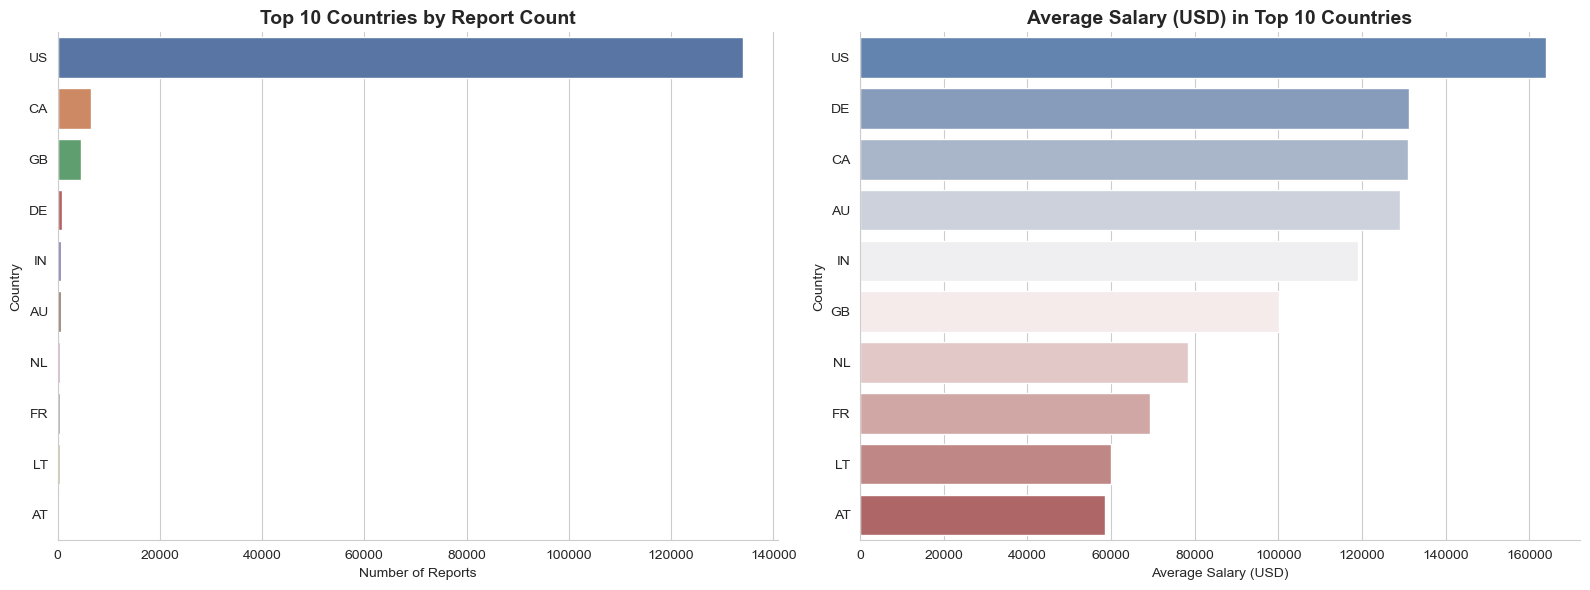

In [27]:
# Set palette   
sns.set_palette("vlag")  

# Call the function which now returns the figure and axes  
fig, (ax1, ax2) = plot_top_countries_salary(df_eda, top_n = 10) 
 
# Adjust layout so subplots do not overlap
plt.tight_layout() 
plt.show()

## 📈 Time Trends — Salary Evolution Over Years

In this section, we explore how both the **number of salary reports** and the **average reported salary in USD** have evolved over the years. Key insights we aim to uncover:

- How has the reporting volume changed across years (e.g. more data from 2020 to 2025)?  
- How has the average salary in USD shifted over time — is it trending up, stable, or volatile?  

By analyzing year‑over‑year changes, we can better understand whether compensation is rising as the field matures, or if there are any unusual dips or spikes that warrant further investigation.  


In [29]:
def plot_yearly_salary_trends(df):
    """
    Plots two side-by-side line charts:
    1. Number of salary records per year.
    2. Average reported salary per year (USD).

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain 'work_year' and 'salary_in_usd' columns.

    Returns
    -------
    fig, (ax1, ax2) : tuple
        Figure and axes objects for optional further customization.
    """
    
    # Count of salary records per year
    year_counts = df['work_year'].value_counts().sort_index()
    
    # Average salary per year
    year_salary = df.groupby('work_year', observed=True)['salary_in_usd'].mean().sort_index()

    # Create figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # First plot: Number of Salary Reports
    ax1.set_title("Number of Salary Reports per Year", fontsize = 14, fontweight = 'bold')
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Count of Records")
    ax1.grid(which = 'both', linestyle = '--', linewidth = 0.5, alpha = 0.7)
    ax1.minorticks_on()  # Show minor ticks
    sns.despine(ax = ax1, top=True, right=True)  # Remove top and right spines for cleaner look

    # Second plot: Average Salary
    ax2.set_title("Average Reported Salary (USD) per Year", fontsize = 16, fontweight = 'bold', pad = 15)
    ax2.set_xlabel("Year", fontsize = 12)
    ax2.set_ylabel("Average Salary (USD)", fontsize = 12)
    ax2.grid(which = 'both', linestyle = '--', linewidth = 0.5, alpha = 0.7)
    ax2.minorticks_on()
    sns.despine(ax = ax2, top=True, right=True)

    # Plot the data
    ax1.plot(year_counts.index, year_counts.values, marker = "o", linewidth = 2)
    ax2.plot(year_salary.index, year_salary.values, marker = "s", linewidth = 2)

    # Return figure and axes for further customization if needed
    return fig, (ax1, ax2)


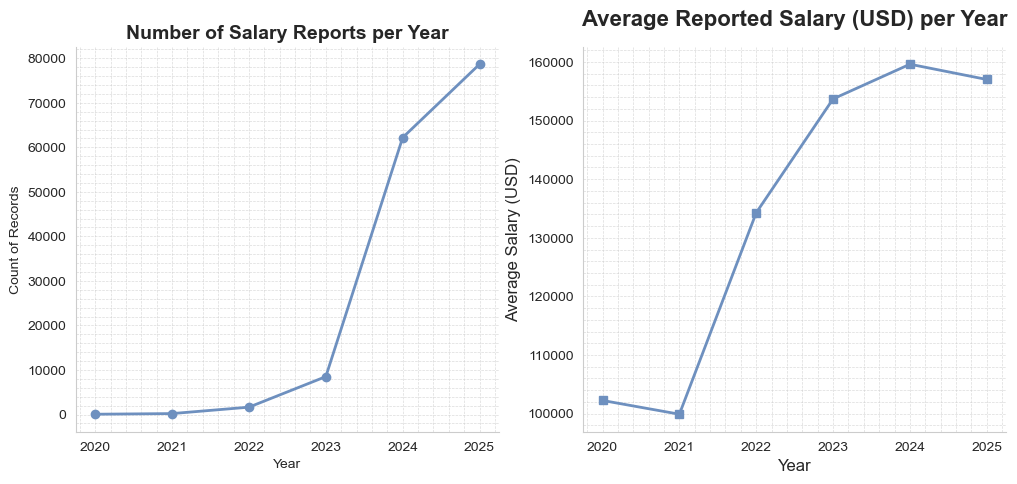

In [30]:
# Call the function to plot yearly salary trends 
fig, (ax1, ax2) = plot_yearly_salary_trends(df_eda)

# Display the plots 
plt.show()

<div style="text-align:center; color:blue; font-size:28px; font-weight:bold;">
🚀 Next Steps
</div>
<br>
Before starting the predictive modeling phase, we will resolve the main EDA questions and prepare high-quality, presentation-ready visualizations: 

---

- **EDA Questions:**  
  - How do salaries differ by **job title** and **experience level**?  
  - Which **countries or regions** offer the highest average salaries?  
  - How does **remote work** affect compensation?  
  - Are there differences across **company sizes**?  
  - How have salaries **evolved from 2020 to 2025**?

---

- **Visualization Improvements:**  
  - Adjust color palettes and font sizes for clarity.  
  - Use consistent figure sizing for all charts.  
  - Add titles, axis labels, and legends where needed.  
  - Highlight outliers or key trends with annotations.  

---
